<a href="https://colab.research.google.com/github/Gr0o00t/Machine-learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression Technique

Importing pacakage

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Downloading data

In [42]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-09-21 05:27:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2021-09-21 05:27:28 (1.71 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Reading the data in dataset

In [43]:
df=pd.read_csv("FuelConsumption.csv")
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [44]:
cdf= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


change index

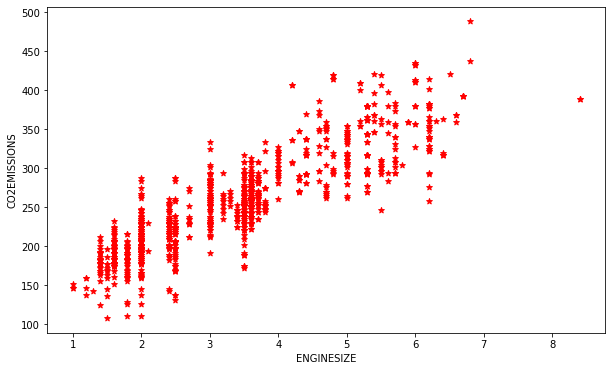

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red',marker='*')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [46]:
msk=np.random.random(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

Simple Regression model

In [47]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.array(train[['ENGINESIZE']])
train_y=np.array(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

print("slope of the curve:",regr.coef_)
print("intercept of the curve:",regr.intercept_)

slope of the curve: [[39.15623793]]
intercept of the curve: [124.69299425]


plot the trendline

<function matplotlib.pyplot.show>

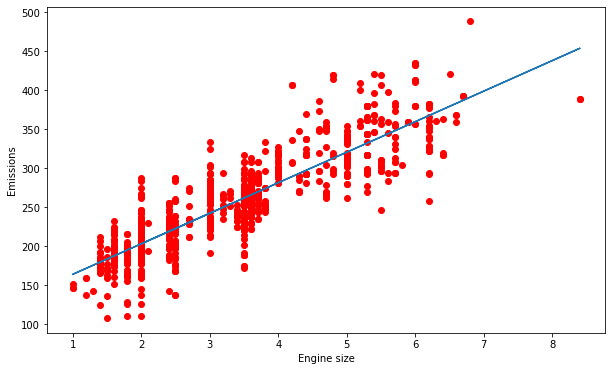

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(train_x,train_y, color='red')
plt.plot(train_x, (train_x*regr.coef_[0][0]+regr.intercept_[0]))
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show

Evaluation


In [49]:
from sklearn.metrics import r2_score

test_x=np.array(test[["ENGINESIZE"]])
test_y=np.array(test[["CO2EMISSIONS"]])
test_y_=regr.predict(test_x)

print("Mean Absolute Error:", np.mean(np.absolute(test_y_ - test_y)))
print("residual sum of square(MSE):",np.mean((test_y_-test_y)**2))
print("R2_score:", r2_score(test_y, test_y_))

Mean Absolute Error: 21.75352380714141
residual sum of square(MSE): 797.308653817762
R2_score: 0.7863362313648906
